# Lab 01: Urbana Weather

---
author: Yiran Hu
date: Feb. 3, 2024
embed-resources: true
---

## Introduction

## Methods

In [272]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from joblib import dump

# for visualization
import matplotlib.pyplot as plt

### Data

In [273]:
weather_train = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-train.csv",
    index_col="date",
    parse_dates=True
)
weather_vtrain = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-vtrain.csv",
    index_col="date",
    parse_dates=True
)
weather_validation = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-validation.csv",
    index_col="date",
    parse_dates=True
)

Use data from Urbana Weather dataset. The data includes measurements of minimum temperature within one day, from 2016 to 2022. The code block below show what data looks like.

In [274]:
weather_train

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-01-01,-4.2715,2016,1,1,1
2016-01-02,-3.8715,2016,1,2,2
2016-01-03,-4.4715,2016,1,3,3
2016-01-04,-3.0215,2016,1,4,4
2016-01-05,-5.7715,2016,1,5,5
...,...,...,...,...,...
2022-12-27,-11.0520,2022,12,27,361
2022-12-28,-5.9020,2022,12,28,362
2022-12-29,5.0980,2022,12,29,363


#### Summary Statistics 

In [275]:
# Yearly Data
train_count=weather_train.groupby("year").agg("count").reset_index()
train_count

,year,temperature_2m_min,month,day,day_of_year
0,2016,366,366,366,366
1,2017,365,365,365,365
2,2018,365,365,365,365
3,2019,365,365,365,365
4,2020,366,366,366,366
5,2021,365,365,365,365
6,2022,365,365,365,365


In [276]:
# Yearly Data
tem_year_mean=weather_train.groupby("year").agg("mean").reset_index()[["year","temperature_2m_min"]]
tem_year_mean

,year,temperature_2m_min
0,2016,8.793391
1,2017,8.399644
2,2018,7.591014
3,2019,7.229781
4,2020,7.684612
5,2021,8.119370
6,2022,7.010192


In [277]:
# Yearly Data
tem_year_std=weather_train.groupby("year").agg("std").reset_index()[["year","temperature_2m_min"]]
tem_year_std

,year,temperature_2m_min
0,2016,10.274506
1,2017,9.692305
2,2018,11.369452
3,2019,10.882260
4,2020,9.383593
5,2021,10.388489
6,2022,11.028170


In [278]:
# Monthly Data
tem_month_mean=weather_train.groupby("month").agg("mean").reset_index()[["month","temperature_2m_min"]]
tem_month_mean

,month,temperature_2m_min
0,1,-5.416767
1,2,-4.380614
2,3,1.522173
3,4,5.925214
4,5,12.639454
5,6,18.211405
6,7,19.998210
7,8,19.088071
8,9,16.571643
9,10,9.756274


In [279]:
# Monthly Data
tem_month_std=weather_train.groupby("month").agg("std").reset_index()[["month","temperature_2m_min"]]
tem_month_std

,month,temperature_2m_min
0,1,6.547430
1,2,6.746122
2,3,5.595675
3,4,5.659612
4,5,5.234890
5,6,3.540279
6,7,2.627939
7,8,2.874603
8,9,3.988397
9,10,5.775242


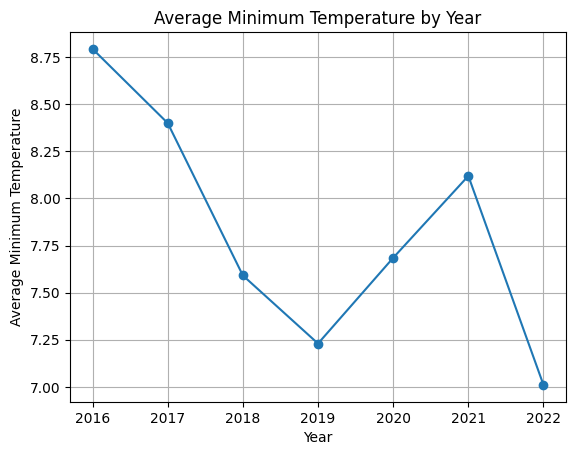

In [280]:
# visualizations
plt.plot(tem_year_mean['year'], tem_year_mean['temperature_2m_min'], marker='o')
plt.title('Average Minimum Temperature by Year')  
plt.xlabel('Year') 
plt.ylabel('Average Minimum Temperature')  
plt.grid(True)  
plt.show()  

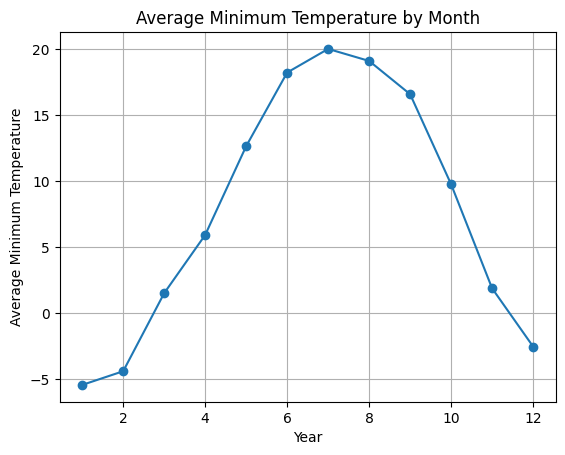

In [281]:
# visualizations
plt.plot(tem_month_mean['month'], tem_month_mean['temperature_2m_min'], marker='o')
plt.title('Average Minimum Temperature by Month')  
plt.xlabel('Year') 
plt.ylabel('Average Minimum Temperature')  
plt.grid(True)  
plt.show()  

Looking at the changes in the average annual minimum temperature, the differences from year to year are not small, and the temperature is not always particularly stable around a certain value. However, the changes in the average monthly temperature show a very clear trend, which is consistent with common sense: the temperature peaks in the summer and gradually falls in the winter.

### Models

In [282]:
# process data for ML
X_train = weather_train[["year", "day_of_year"]]
y_train = weather_train["temperature_2m_min"]

X_vtrain = weather_vtrain[["year", "day_of_year"]]
y_vtrain = weather_vtrain["temperature_2m_min"]

X_validation = weather_validation[["year", "day_of_year"]]
y_validation = weather_validation["temperature_2m_min"]

In [283]:
# train models
knn100=KNeighborsRegressor(100)
knn50=KNeighborsRegressor(50)
knn20=KNeighborsRegressor(20)
knn10=KNeighborsRegressor(10)
knn05=KNeighborsRegressor(5)

knn100.fit(X_train,y_train)
knn50.fit(X_vtrain,y_vtrain)
knn20.fit(X_vtrain,y_vtrain)
knn10.fit(X_vtrain,y_vtrain)
knn05.fit(X_vtrain,y_vtrain)

KNeighborsRegressor()

In [284]:
# def RMSE():
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

In [285]:
# choose a model
rmse100=RMSE(y_validation, knn100.predict(X_validation))
rmse50=RMSE(y_validation, knn50.predict(X_validation))
rmse20=RMSE(y_validation, knn20.predict(X_validation))
rmse10=RMSE(y_validation, knn10.predict(X_validation))
rmse05=RMSE(y_validation, knn05.predict(X_validation))

print("RMSE for k=100: ", rmse100)
print("RMSE for k=50: ", rmse50)
print("RMSE for k=20: ", rmse20)
print("RMSE for k=10: ", rmse10)
print("RMSE for k=5: ", rmse05)

RMSE for k=100:  4.788348526311783
RMSE for k=50:  5.000247795158915
RMSE for k=20:  5.030581436412295
RMSE for k=10:  5.2096224788786
RMSE for k=5:  5.481193937095656


In [286]:
# save models
dump(knn20, "urbana-weather.joblib")

['urbana-weather.joblib']

I choose KNN model to predict the minimum temperature of the next day. The code block above show the model fitting process. After calculating RMSE, I found that for k=100, the model was more accurate. So I will choose k=100 for the next procedure.

## Results

In [287]:
# report model metrics
print("RMSE of train: ", RMSE(y_train, knn100.predict(X_train)))

RMSE of train:  4.843063473354476


The RMSE of the model is around 4.84, which is not very high. This means that the model is relatively accurate in predicting the minimum temperature.

## Discussion

### Conclusion